In [4]:
import psutil
import GPUtil
import time
import threading

ModuleNotFoundError: No module named 'distutils'

In [ ]:
def monitor_power_usage(duration, event, result):
    cpu_usage = []
    memory_usage = []
    gpu_usage = []
    gpu_memory_usage = []

    start_time = time.time()
    while not event.is_set():
        cpu_usage.append(psutil.cpu_percent(interval=0.1))
        memory_usage.append(psutil.virtual_memory().percent)
        
        gpus = GPUtil.getGPUs()
        if gpus:
            gpu = gpus[0]
            gpu_usage.append(gpu.load * 100)
            gpu_memory_usage.append(gpu.memoryUtil * 100)
        
        time.sleep(0.1)
    
    result['cpu_usage'] = cpu_usage
    result['memory_usage'] = memory_usage
    result['gpu_usage'] = gpu_usage
    result['gpu_memory_usage'] = gpu_memory_usage

In [ ]:
from TTS.api import TTS

def execute_tts_with_monitoring():
    # Initialize result dictionary and event
    result = {}
    event = threading.Event()

    # Start monitoring thread
    monitoring_thread = threading.Thread(target=monitor_power_usage, args=(10, event, result))
    monitoring_thread.start()

    # Execute TTS function
    tts = TTS("tts_models/multilingual/multi-dataset/xtts_v2", gpu=True)
    tts.to(0)
    tts.tts(text='Ciao amico mio come stai, io sinceramente non sono più sicuro di essere vivo.', 
            speaker_wav='../backend/input/it.wav', language='it')

    # Stop monitoring thread
    event.set()
    monitoring_thread.join()

    return result

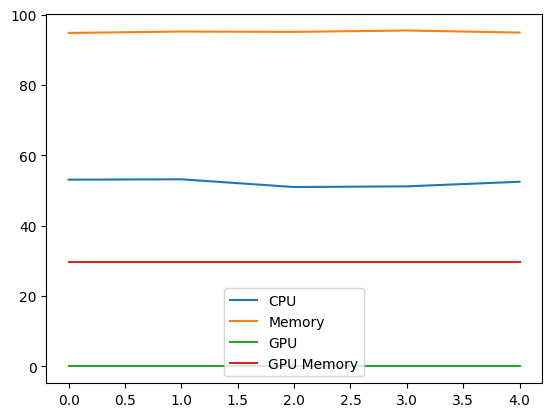

In [16]:
performance_metrics = execute_tts_with_monitoring()
    
print("CPU Usage:", performance_metrics['cpu_usage'])
print("Memory Usage:", performance_metrics['memory_usage'])
print("GPU Usage:", performance_metrics['gpu_usage'])
print("GPU Memory Usage:", performance_metrics['gpu_memory_usage'])

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
    
plt.subplot(2, 2, 1)
plt.plot(performance_metrics['cpu_usage'])
plt.xlabel('Time (s)')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage Over Time')

plt.subplot(2, 2, 2)
plt.plot(performance_metrics['memory_usage'])
plt.xlabel('Time (s)')
plt.ylabel('Memory Usage (%)')
plt.title('Memory Usage Over Time')

if performance_metrics['gpu_usage']:
    plt.subplot(2, 2, 3)
    plt.plot(performance_metrics['gpu_usage'])
    plt.xlabel('Time (s)')
    plt.ylabel('GPU Usage (%)')
    plt.title('GPU Usage Over Time')

    plt.subplot(2, 2, 4)
    plt.plot(performance_metrics['gpu_memory_usage'])
    plt.xlabel('Time (s)')
    plt.ylabel('GPU Memory Usage (%)')
    plt.title('GPU Memory Usage Over Time')

plt.tight_layout()
plt.show()